In [3]:
import json
import numpy as np
import pandas as pd
from seir_model import *

In [7]:
# Load in the data and initialize the class instance
population_data_file = './data/nst-est2019-alldata.csv'
deaths_data_file = './data/Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv'

In [ ]:
model = SEIRModel(population_data_file, deaths_data_file)
model.set_location('Pennsylvania')

# Pack the Parameters
#                   b0  b1 b2 b3 b4 b5 b6    d
params_optimize = (0.08, 0.2, 0.04, -.1, 0.5, -0.3, -0.4, 0.000166)
# params_zero = (0.08, 0, 0, 0, 0, 0, 0, 0.02)
# jesse_params_optimize = (0.08232008031142314, 0.21191456767635256, 0.048853630929886295, -0.1123035915640471, 0.590565599767146, -0.3434894220493361, -0.4778608650714212, 0.0020937821193444854)
#               q   delta gamma    E0       beta_0  degree
params_fixed = (0.5, 6,     15,     1e-8,   0.08,   6)

options_one = {'disp': True}

# Prime the pump with Powell
res = model.optimize_model(params_optimize, params_fixed, method='Powell', kwargs=options_one)

# Now do simplex
options_two = {'xatol': 1e-8, 'maxiters': len(res.x)*1000, 'adaptive': True, 'disp': True}
res = model.optimize_model(res.x, params_fixed, method='nelder-mead', kwargs=options_two)

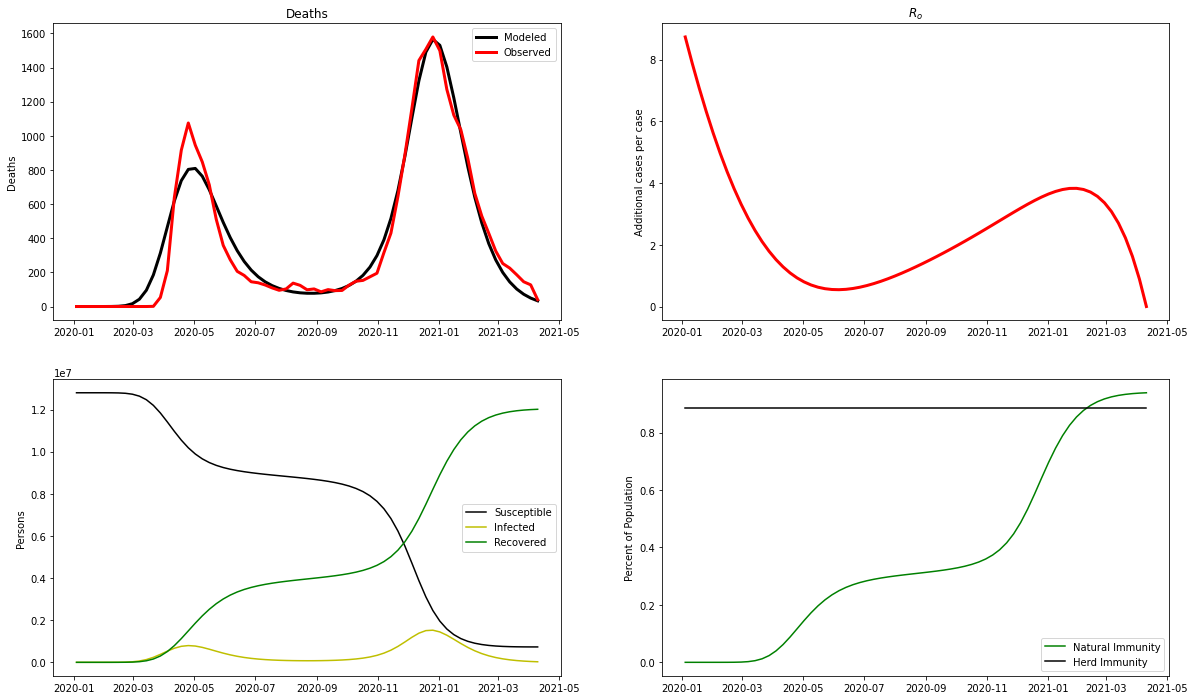

In [4]:
model.plot_results()

In [13]:
# Load in .json  dictionary 
import json

with open('./dict_results.json') as f:
    data = json.load(f)

# Create pandas df from dictionary
df = pd.DataFrame.from_dict(data, orient='index', columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 
                                                          'Death Rate', 'E0 Frac', 'Infected', 'Recovered',
                                                          'Deaths'])
print(df)
# Add population data to the df
# df = df.merge(cd,on="NAME")


# Save the df to a pickel file

                            x0        x1        x2        x3        x4  \
Alaska                0.101225  0.238463  0.088360 -0.044448  0.471226   
Alabama               0.075317  0.108515  0.037333 -0.096532  0.597805   
Arkansas              0.080620  0.084012 -0.011565 -0.097088  0.509480   
Arizona               0.074615  0.059583 -0.059755  0.080691  2.355013   
California            0.069519  0.182095  0.056188 -0.122776  0.554282   
Colorado              0.097171  0.271963  0.150318 -0.052023  0.626803   
Connecticut           0.259737  0.199356  0.046693 -0.157687  0.408533   
District of Columbia  0.100739  0.292935  0.278024 -0.189947  0.474730   
Delaware              0.079969  0.263058  0.382430 -0.063582  0.350078   
Florida               0.092976  0.194419  0.012349 -0.109306  0.490878   
Georgia               0.075744  0.120427  0.003744 -0.102512  0.638523   
Hawaii                0.180068  0.259183  0.030425 -0.010633  0.468733   
Iowa                  0.090796  0.1840

In [9]:
model = SEIRModel(population_data_file, deaths_data_file)
print(model.pdata)

                    NAME  POPESTIMATE2019
0          United States        328239523
1       Northeast Region         55982803
2         Midwest Region         68329004
3           South Region        125580448
4            West Region         78347268
5                Alabama          4903185
6                 Alaska           731545
7                Arizona          7278717
8               Arkansas          3017804
9             California         39512223
10              Colorado          5758736
11           Connecticut          3565287
12              Delaware           973764
13  District of Columbia           705749
14               Florida         21477737
15               Georgia         10617423
16                Hawaii          1415872
17                 Idaho          1787065
18              Illinois         12671821
19               Indiana          6732219
20                  Iowa          3155070
21                Kansas          2913314
22              Kentucky          

In [ ]:
from scipy.interpolate import interp1d
from scipy.stats import norm

step = np.array([2e-8, 1e-9])
sigma = 1e-1
x0 = np.array([model.p['d']])